In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy
import math
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from math import exp, sqrt, pi
from scipy.stats import chi2_contingency, pearsonr
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [29]:
complete = pd.read_csv('complete.csv')
complete = complete.drop(columns=['Unnamed: 0'])

complete.head()

,Zone,Disponibilité alimentaire volailles (Kcal/personne/jour),Disponibilité de protéines (g/personne/jour),Importations volailles (milliers tonnes),Production volailles (milliers tonnes),Disponibilité alimentaire totale (Kcal/personne/jour),PIB / Habitant ($),Stabilité politique (indice),Evolution Pop % (2000-2017)
0,Afghanistan,5.0,0.54,29.0,28.0,2266.0,2058.4,-2.80,75.0
1,Afrique du Sud,143.0,14.11,514.0,1667.0,2902.0,13860.3,-0.28,27.0
2,Albanie,85.0,6.26,38.0,13.0,3314.0,12771.0,0.38,-8.0
3,Algérie,22.0,1.97,2.0,275.0,3402.0,11737.4,-0.92,33.0
4,Allemagne,71.0,7.96,842.0,1514.0,3551.0,53071.5,0.59,2.0


In [30]:
# Pour réaliser une ACP, la standardisation des données est une étape cruciale.

data_quanti = complete.drop("Zone", axis=1)
scaler = StandardScaler()
Z = scaler.fit_transform(data_quanti)

pca = PCA()
data_pca = pca.fit_transform(Z)

print("Moyennes:", np.mean(Z, axis=0))
print("Écarts types:", np.std(Z, axis=0))

Moyennes: [ 2.22044605e-17  0.00000000e+00 -1.11022302e-17 -8.32667268e-18
 -1.11022302e-17  1.66533454e-17 -4.44089210e-17 -1.11022302e-17]
Écarts types: [1. 1. 1. 1. 1. 1. 1. 1.]


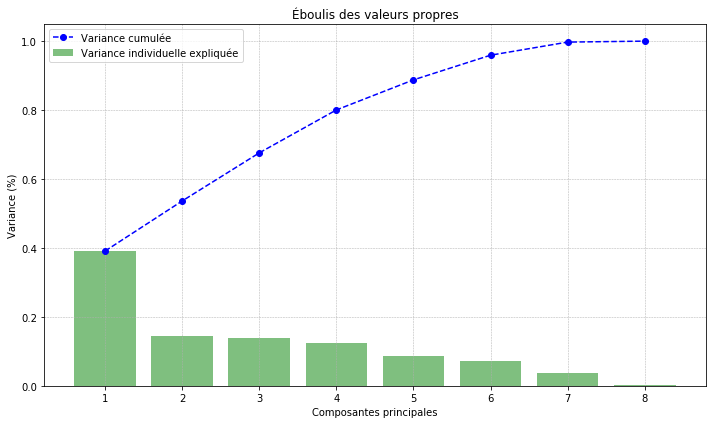

Variance cumulée jusqu'à PC1: 39.11%
Variance cumulée jusqu'à PC2: 53.62%
Variance cumulée jusqu'à PC3: 67.58%
Variance cumulée jusqu'à PC4: 80.04%
Variance cumulée jusqu'à PC5: 88.76%
Variance cumulée jusqu'à PC6: 95.92%
Variance cumulée jusqu'à PC7: 99.72%
Variance cumulée jusqu'à PC8: 100.00%


In [31]:
# Réalisation d'un graphique d'éboulis des valeurs propres pour avoir
# un premier aperçu du nombre de composantes principales nous allons garder 
# pour la suite de notre analyse

# Pourcentage de variance expliquée et variance cumulée
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Tracer l'éboulis des valeurs propres
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Variance individuelle expliquée', color='g')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', color='b', label="Variance cumulée")
plt.ylabel('Variance (%)')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.title("Éboulis des valeurs propres")
plt.tight_layout()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Mise en avant de la variance cumulée pour choisir un nombre pertinent de composantes principales
for i, cum_var in enumerate(cumulative_variance):
    print(f"Variance cumulée jusqu'à PC{i+1}: {cum_var*100:.2f}%")

Le choix ici sera donc de 4 composantes principales pour réaliser l'analyse et l'étude de marché. 

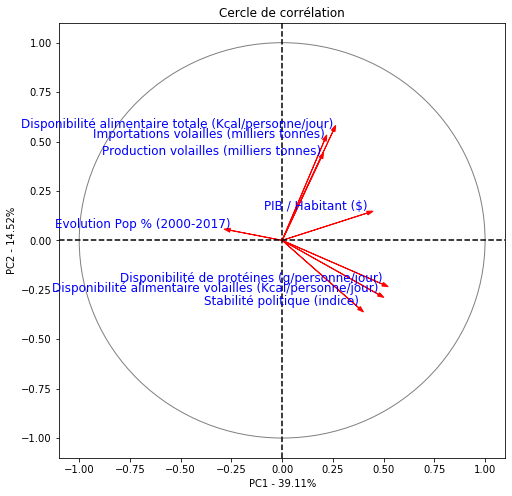

In [32]:
# Récupérez les composantes principales
pcs = pca.components_

# Affichez le cercle des corrélations
plt.figure(figsize=(8, 8))

# Définissez la limite des axes pour que le cercle soit à l'échelle
l = 1.1
plt.xlim([-l, l])
plt.ylim([-l, l])

# Parcourez chaque variable et tracez-la sur le cercle des corrélations
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, color='r', head_width=0.02, head_length=0.03)
    plt.text(x, y, data_quanti.columns[i], color='b', ha='right', va='bottom', fontsize=12)

# Ajoutez le cercle unitaire
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
plt.gca().add_artist(circle)

# Affichez les axes
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

# Ajoutez les pourcentages de variance expliquée
plt.xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}%')

plt.title('Cercle de corrélation')
plt.show()

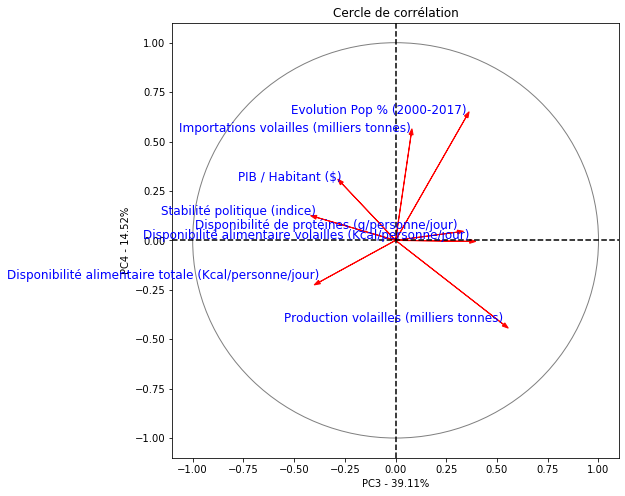

In [33]:
# Récupérez les composantes principales
pcs = pca.components_

# Affichez le cercle des corrélations
plt.figure(figsize=(8, 8))

# Définissez la limite des axes pour que le cercle soit à l'échelle
l = 1.1
plt.xlim([-l, l])
plt.ylim([-l, l])

# Parcourez chaque variable et tracez-la sur le cercle des corrélations
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    plt.arrow(0, 0, x, y, color='r', head_width=0.02, head_length=0.03)
    plt.text(x, y, data_quanti.columns[i], color='b', ha='right', va='bottom', fontsize=12)

# Ajoutez le cercle unitaire
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
plt.gca().add_artist(circle)

# Affichez les axes
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

# Ajoutez les pourcentages de variance expliquée
plt.xlabel(f'PC3 - {pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'PC4 - {pca.explained_variance_ratio_[1]*100:.2f}%')

plt.title('Cercle de corrélation')
plt.show()

In [34]:
# Conversion des composantes en DataFrame
components_df = pd.DataFrame(pcs, columns=data_quanti.columns, index=[f"PC{i+1}" for i in range(pcs.shape[0])])

print("Les variables importantes de la 1ere composante :\n", components_df.loc["PC1"].sort_values(ascending=False), "\n")
print("Les variables importantes de la 2eme composante :\n", components_df.loc["PC2"].sort_values(ascending=False), "\n")
print("Les variables importantes de la 3eme composante :\n", components_df.loc["PC3"].sort_values(ascending=False), "\n")
print("Les variables importantes de la 4eme composante :\n", components_df.loc["PC4"].sort_values(ascending=False), "\n")

Les variables importantes de la 1ere composante :
 Disponibilité de protéines (g/personne/jour)                0.495451
Disponibilité alimentaire volailles (Kcal/personne/jour)    0.475341
PIB / Habitant ($)                                          0.419522
Stabilité politique (indice)                                0.378616
Disponibilité alimentaire totale (Kcal/personne/jour)       0.251479
Importations volailles (milliers tonnes)                    0.208351
Production volailles (milliers tonnes)                      0.191547
Evolution Pop % (2000-2017)                                -0.256686
Name: PC1, dtype: float64 

Les variables importantes de la 2eme composante :
 Disponibilité alimentaire totale (Kcal/personne/jour)       0.554214
Importations volailles (milliers tonnes)                    0.505675
Production volailles (milliers tonnes)                      0.417415
PIB / Habitant ($)                                          0.138257
Evolution Pop % (2000-2017)               

En résumé :

La PC1 représente une combinaison de variables liées à la prospérité, la nutrition et la stabilité d'un pays.

La PC2 réprésente une combinaison de variables liées à la disponibilité alimentaire globale, la production de volailles et de la dépendance à l'importation.

La PC3 représente un contraste entre les pays axés sur la production et la consommation de volailles et ceux qui ont une stabilité politique élevée, un PIB par habitant élevé et une disponibilité alimentaire globale élevée.

La PC4 met en évidence une relation entre l'évolution de la population et les importations de volailles.

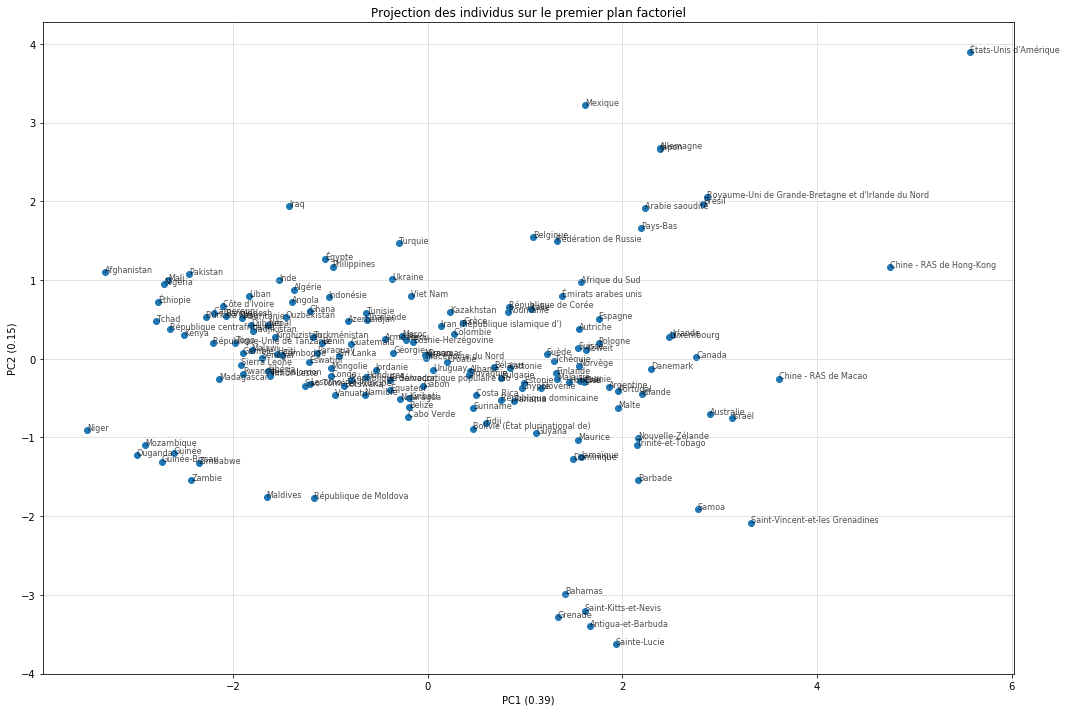

In [35]:
# Obtenez les projections des individus sur les composantes
scores = pca.transform(Z)

# Créez le graphique
plt.figure(figsize=(15, 10))
plt.scatter(scores[:, 0], scores[:, 1], marker='o')

# Étiquetez chaque point avec le nom du pays
for i, country in enumerate(complete['Zone']):
    plt.annotate(country, (scores[i, 0], scores[i, 1]), fontsize=8, alpha=0.7)

# Définissez les étiquettes des axes en fonction des pourcentages de variance expliquée
# pour les 2 premières composantes principales (PC1 et PC2)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2f})')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2f})')
plt.title('Projection des individus sur le premier plan factoriel')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [36]:
# Créons une matrice de données à partir des 4 composantes principales retenues 

X_pca = pca.transform(data_pca)[:, :4]

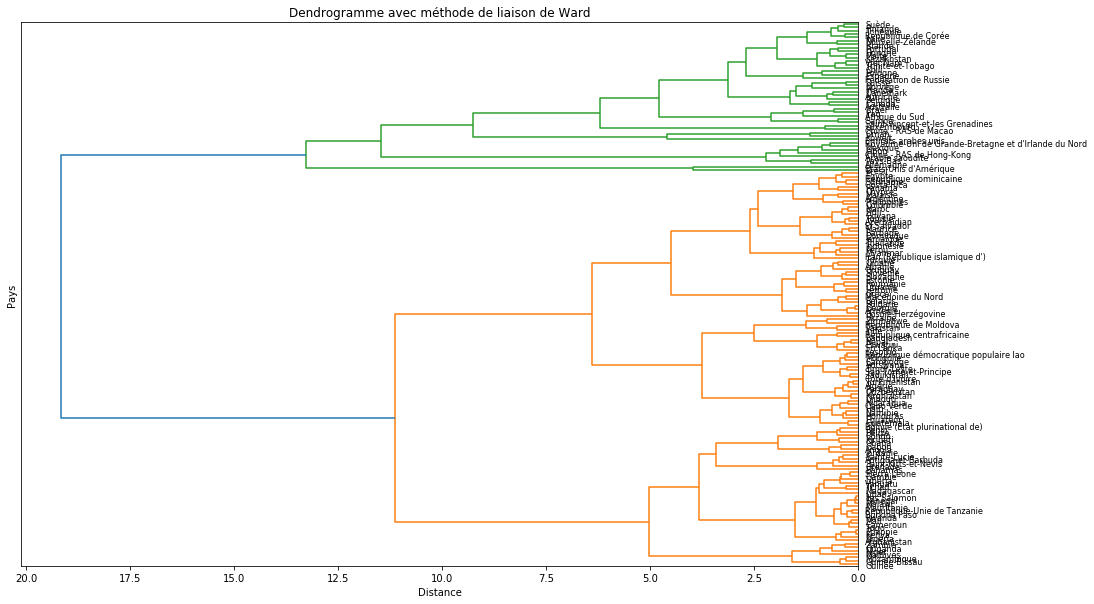

In [37]:
# Création des clusters hiérarchiques
Z = linkage(X_pca, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(15, 10))
dendrogram(Z, orientation='left', labels=complete['Zone'].values, leaf_font_size=8)
plt.title('Dendrogramme avec méthode de liaison de Ward')
plt.xlabel('Distance')
plt.ylabel('Pays')
plt.show()

# La méthode ward est utilisée ici pour minimiser la variance au sein des clusters qui sont fusionnés

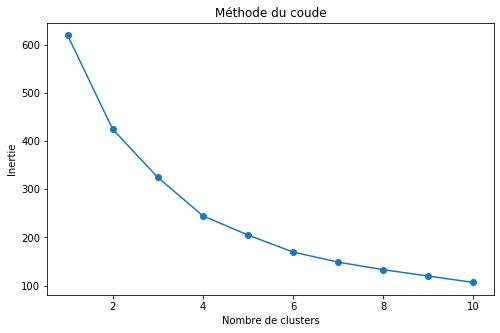

In [38]:
# A l'aide de la méthode des kmeans et du coude, nous allons déterminer 
# le nombre optimal de clusters pour la suite de l'analyse

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit_predict(X_pca[:,:4])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, '-o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

L'inertie baisse significativement de 1 à 5 : +600 à environ 200 (-400)

Elle ralentit ensuite considérablement après 5 : de 200 à 100 (-100) (4 fois moins de perte d'inertie)

On peut donc conclure que le nombre idéal de clusters pour cette analyse est de 5.

In [39]:
# Attribuons les clusters aux pays concernés 

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca[:, :4])
complete['Cluster'] = clusters

for i in range(n_clusters):
    cluster_i_countries = complete[complete['Cluster'] == i]['Zone'].tolist()
    print(f"Le Cluster {i+1} contient {len(cluster_i_countries)} pays :")
    print(", ".join(cluster_i_countries))
    print("\n")

Le Cluster 1 contient 60 pays :
Albanie, Algérie, Arménie, Azerbaïdjan, Bangladesh, Barbade, Bosnie-Herzégovine, Bulgarie, Bélarus, Colombie, Costa Rica, Croatie, Djibouti, Dominique, El Salvador, Estonie, Eswatini, Fidji, Grèce, Guyana, Géorgie, Haïti, Hongrie, Inde, Indonésie, Iran (République islamique d'), Jamaïque, Kirghizistan, Lesotho, Lettonie, Lituanie, Macédoine du Nord, Maroc, Maurice, Myanmar, Nicaragua, Népal, Ouzbékistan, Paraguay, Philippines, Pérou, Roumanie, République centrafricaine, République de Moldova, République dominicaine, Saint-Vincent-et-les Grenadines, Samoa, Slovaquie, Slovénie, Sri Lanka, Suriname, Thaïlande, Trinité-et-Tobago, Tunisie, Turkménistan, Turquie, Ukraine, Uruguay, Viet Nam, Égypte


Le Cluster 2 contient 58 pays :
Afghanistan, Angola, Antigua-et-Barbuda, Bahamas, Belize, Bolivie (État plurinational de), Botswana, Burkina Faso, Bénin, Cabo Verde, Cambodge, Cameroun, Congo, Côte d'Ivoire, Gabon, Gambie, Ghana, Grenade, Guatemala, Guinée, Guinée-

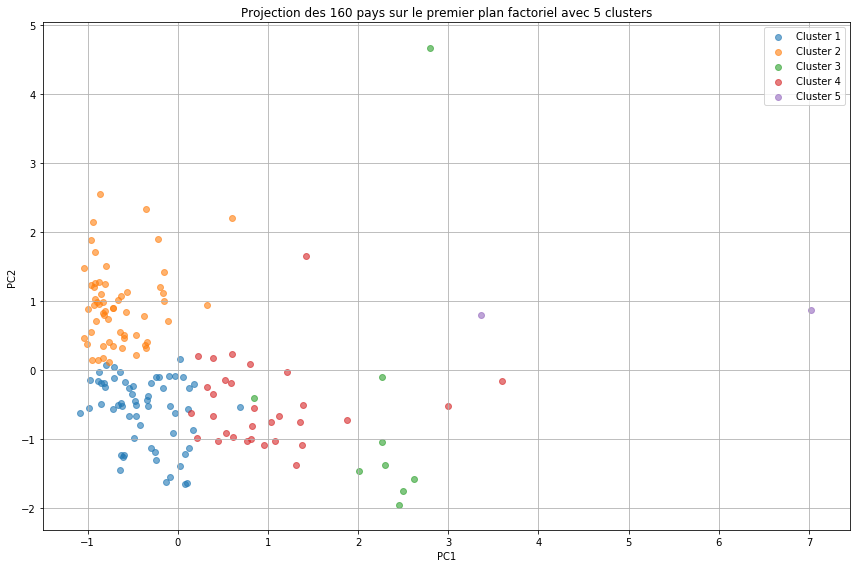

In [40]:
# Attribuons les clusters aux pays concernés 

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca[:, :4])
complete['Cluster'] = clusters

# Visualisation
plt.figure(figsize=(12, 8))

# Visualiser chaque cluster
for i in range(n_clusters):
    # Points du cluster
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.6)


plt.title('Projection des 160 pays sur le premier plan factoriel avec 5 clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

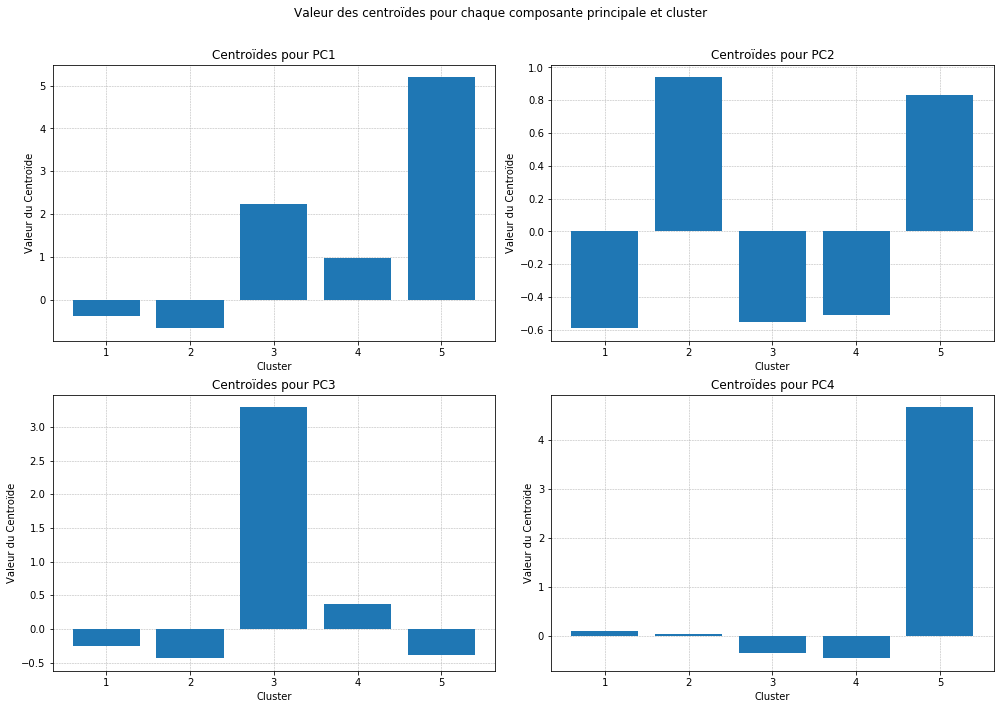

In [41]:
# Nous utiliserons dans un premier temps la méthode des centroïdes pour comprendre
# les caractéristiques moyennes de chaque pays des clusters que nous analysons

# Extraction des centroïdes
centroids = kmeans.cluster_centers_

# Convertir les centroïdes en DataFrame pour une visualisation facile
df_centroids = pd.DataFrame(centroids, columns=[f"PC{i+1}" for i in range(centroids.shape[1])])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle("Valeur des centroïdes pour chaque composante principale et cluster")

clusters = list(range(1, df_centroids.shape[0] +1))

# Parcourir chaque composante principale et créer un histogramme
for i, ax in enumerate(axes.flatten()):
    ax.bar(clusters, df_centroids[f"PC{i+1}"])
    ax.set_title(f"Centroïdes pour PC{i+1}")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Valeur du Centroïde")
    ax.set_xticks(clusters)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

Pour rappel : 

La PC1 représente une combinaison de variables liées à la propsérité, la nutrition et la stabilité d'un pays.

La PC2 réprésente une combinaison de variables liées à la disponibilité alimentaire globale, la production de volailles et de la dépendance à l'importation.

La PC3 représente un contraste entre les pays axés sur la production et la consommation de volailles et ceux qui ont une stabilité politique élevée, un PIB par habitant élevé et une disponibilité alimentaire globale élevée.

La PC4 met en évidence une relation entre l'évolution de la population et les importations de volailles.

Les Clusters 1 et 2 ne seront pas retenus à ce stade de l'analyse car ne répondant à aucun critère favorable (indice de stabilité politique et un PIB/habitant faible) pour s'introduire sur leur marché.

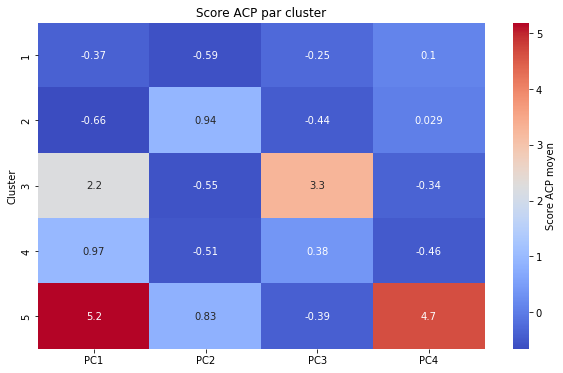

In [42]:
# Attribuons les clusters aux pays concernés 

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca[:, :4])

# Création du dataframe scores_df à partir de nos données standardisées lors de l'ACP 
scores_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=data_quanti.index)

# Ajoutez la colonne Cluster au DataFrame des scores
scores_df['Cluster'] = clusters

# Utilisez le DataFrame scores_df que nous avons créé précédemment
grouped_scores = scores_df.groupby('Cluster').mean()
grouped_scores.index = grouped_scores.index + 1


plt.figure(figsize=(10, 6))
sns.heatmap(grouped_scores.iloc[:, :4], cmap="coolwarm", annot=True, cbar_kws={'label': 'Score ACP moyen'})
plt.title("Score ACP par cluster")
plt.show()

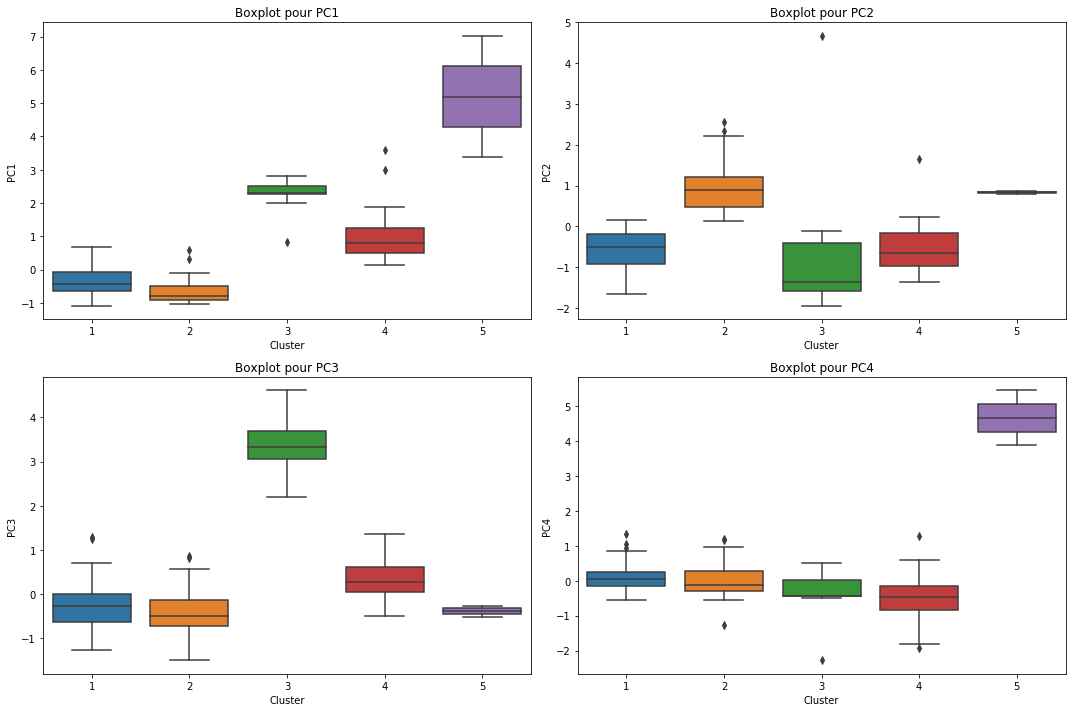

In [43]:
# Visualisons les résultats sur des graphiques de type boxplot pour identifier
# la distribution des données au sein des clusters et la présence de potentiels outliers

# Configuration de l'affichage
plt.figure(figsize=(15, 10))

# Création des graphiques pour chaque composante principale
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=scores_df, x='Cluster', y=f'PC{i+1}')
    plt.title(f'Boxplot pour PC{i+1}')
    plt.ylabel(f'PC{i+1}')
    plt.xlabel('Cluster')
    plt.xticks(ticks=range(5), labels=[str(j) for j in range(1, 6)])

plt.tight_layout()
plt.show()


A partir des différents graphiques et des multiples observations que l'on peut faire
les clusters 3, 4 et 5 seront retenus.

Il faut à présent retenir et classer les pays ayant contribuer le plus à l'inertie de nos 
2 premières composantes principales (composantes les plus cohérentes dans le choix des pays).

In [53]:
# Filtrez le DataFrame pour obtenir seulement les pays des clusters 2, 3, et 4
filtered_countries = complete[complete['Cluster'].isin([2, 3, 4])]

# Obtenez les indices de ces pays
merged_indices = filtered_countries.index

# Obtenez un sous-ensemble du DataFrame des scores pour ces indices
merged_df = scores_df.loc[merged_indices].copy()

# Calculez la contribution à l'inertie pour les quatre composantes principales
merged_df['Inertia_Contribution'] = merged_df['PC1']**2 + merged_df['PC2']**2 + merged_df['PC3']**2 + merged_df['PC4']**2

# Triez le DataFrame par contribution à l'inertie et prenez le top 10
sorted_df = merged_df.sort_values(by='Inertia_Contribution', ascending=False)

# Récupérez les noms des pays pour le top 10
top_10_countries = filtered_countries.loc[sorted_df.index[:10], 'Zone'].tolist()

print("\nTop 10 des pays ayant le plus contribué à l'inertie :")
for i, country in enumerate(top_10_countries, 1):
    print(f"{i}. {country}")


Top 10 des pays ayant le plus contribué à l'inertie :
1. États-Unis d'Amérique
2. Émirats arabes unis
3. Chine - RAS de Hong-Kong
4. Brésil
5. Japon
6. Mexique
7. Allemagne
8. Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
9. Arabie saoudite
10. Chine - RAS de Macao


Le classement des pays ayant le plus contribué à l'inertie, c'est-à-dire ceux qui présentent des spécificités notables sur les axes analysés, met en évidence des marchés potentiels intéressants pour notre expansion :

- États-Unis d'Amérique : Un marché vaste avec une forte demande en produits alimentaires. Leur position dominante sur la PC1 suggère une prospérité économique, une stabilité et une bonne nutrition (disponibilité alimentaire élévé).
- Émirats arabes unis et Chine - RAS de Hong-Kong : Ces marchés démontrent une disponibilité alimentaire importante et une dépendance à l'importation, indiquée par leur position sur la PC2. Cela pourrait signifier une opportunité pour les produits importés comme les nôtres.
- Brésil et Japon : Bien qu'ils soient contrastés sur de nombreux aspects, ces deux pays montrent une combinaison de prospérité, de stabilité, et de demande en volailles, rendant ces marchés attrayants pour une entreprise comme la nôtre.

Les autres pays de la liste, tels que le Mexique, l'Allemagne, le Royaume-Uni, l'Arabie saoudite et la Chine - RAS de Macao, offrent également des opportunités intéressantes en raison de leur consommation élevée de volailles, de leur stabilité politique, et/ou de leur PIB par habitant élevé.

La PC3 et PC4, bien qu'elles n'aient pas été primordiales dans le classement, offrent des nuances supplémentaires sur la relation entre la consommation de volailles, la stabilité politique, le PIB par habitant, et la dépendance à l'importation. Ces nuances pourraient être utilisées pour affiner notre stratégie d'entrée sur ces marchés.

En conclusion, pour une première expansion internationale de "La poule qui chante", les États-Unis, les Émirats arabes unis, Hong-Kong, le Brésil, et le Japon se démarquent comme des marchés clés. Une approche différenciée, adaptée aux spécificités de chaque marché, permettra à l'entreprise de maximiser ses chances de succès à l'international.